# Classification on breast-cancer dataset

In [1]:
# Load modules 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [2]:
# Load dataset
names=['class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat']

dataset = read_csv('breast-cancer.data', names=names)

dataset.shape

(286, 10)

In [3]:
dataset.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
#change how missing data is labeled
mask_1 = dataset['node_caps'].str.contains('\?')

In [5]:
dataset.loc[mask_1,'node_caps'] = 'missing'
dataset['node_caps_missing'] = mask_1
dataset[mask_1]

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing
145,no-recurrence-events,40-49,premeno,25-29,0-2,missing,2,left,right_low,yes,True
163,no-recurrence-events,60-69,ge40,25-29,3-5,missing,1,right,left_up,yes,True
164,no-recurrence-events,60-69,ge40,25-29,3-5,missing,1,right,left_low,yes,True
183,no-recurrence-events,50-59,ge40,30-34,9-11,missing,3,left,left_up,yes,True
184,no-recurrence-events,50-59,ge40,30-34,9-11,missing,3,left,left_low,yes,True
233,recurrence-events,70-79,ge40,15-19,9-11,missing,1,left,left_low,yes,True
263,recurrence-events,50-59,lt40,20-24,0-2,missing,1,left,left_up,no,True
264,recurrence-events,50-59,lt40,20-24,0-2,missing,1,left,left_low,no,True


In [6]:
mask_2 = dataset['breast_quad'].str.contains('\?')

In [7]:
dataset.loc[mask_2,'breast_quad'] = 'missing'
dataset['breast_quad_missing'] = mask_2
dataset[mask_2]

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing,breast_quad_missing
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,missing,no,False,True


In [8]:
dataset['node_caps_missing'] = dataset['node_caps_missing'].astype(int)
dataset['breast_quad_missing'] = dataset['breast_quad_missing'].astype(int)

In [9]:
dataset.describe(include='object')

,class,age,menopause,tumor_size,inv_nodes,node_caps,breast,breast_quad,irradiat
count,286,286,286,286,286,286,286,286,286
unique,2,6,3,11,7,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,201,96,150,60,213,222,152,110,218


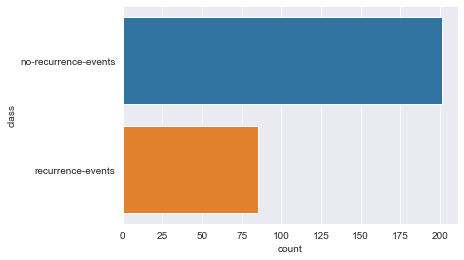

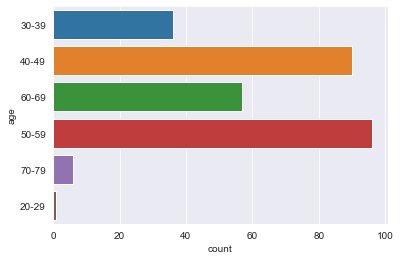

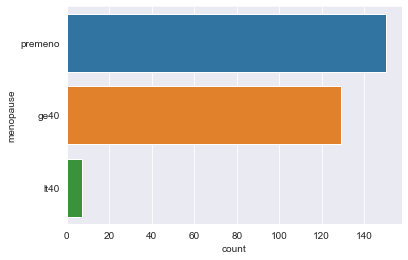

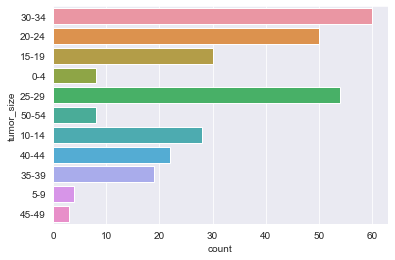

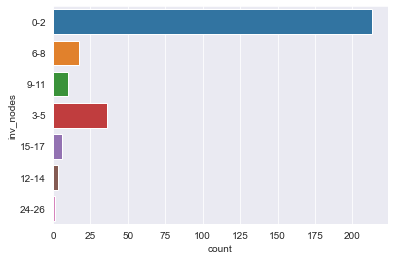

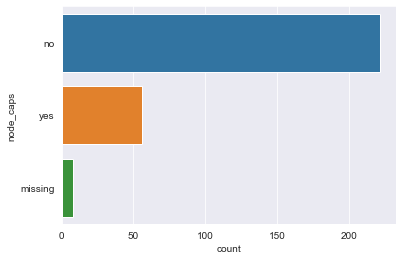

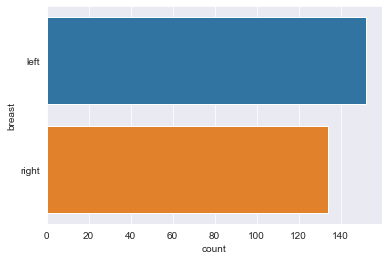

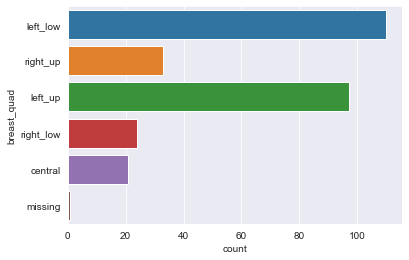

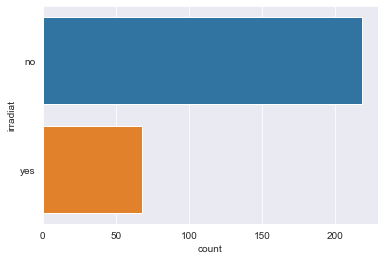

In [10]:
import seaborn as sns
sns.set_style('darkgrid')
for column in dataset.dtypes[dataset.dtypes == 'object'].index:
    sns.countplot(y=dataset[column])
    plt.show()

In [11]:
dataset.groupby('class').size()

class
no-recurrence-events    201
recurrence-events        85
dtype: int64

In [12]:
dataset.groupby('age').size()

age
20-29     1
30-39    36
40-49    90
50-59    96
60-69    57
70-79     6
dtype: int64

In [13]:
dataset.groupby('menopause').size()

menopause
ge40       129
lt40         7
premeno    150
dtype: int64

In [14]:
dataset.groupby('tumor_size').size()

tumor_size
0-4       8
10-14    28
15-19    30
20-24    50
25-29    54
30-34    60
35-39    19
40-44    22
45-49     3
5-9       4
50-54     8
dtype: int64

In [15]:
dataset.groupby('inv_nodes').size()

inv_nodes
0-2      213
12-14      3
15-17      6
24-26      1
3-5       36
6-8       17
9-11      10
dtype: int64

In [16]:
dataset.groupby('node_caps').size()

node_caps
missing      8
no         222
yes         56
dtype: int64

In [17]:
dataset.groupby('deg_malig').size()

deg_malig
1     71
2    130
3     85
dtype: int64

In [18]:
dataset.groupby('breast').size()

breast
left     152
right    134
dtype: int64

In [19]:
dataset.groupby('breast_quad').size()

breast_quad
central       21
left_low     110
left_up       97
missing        1
right_low     24
right_up      33
dtype: int64

In [20]:
dataset.groupby('irradiat').size()

irradiat
no     218
yes     68
dtype: int64

In [21]:
dataset["deg_malig"].replace("3", 3, inplace = True)
dataset["deg_malig"].replace("2", 2, inplace = True)
dataset["deg_malig"].replace("1", 1, inplace = True)

In [22]:
import numpy as np
dataset["breast"] = np.where(dataset["breast"] == "right", 0, 1)

In [23]:
dataset["irradiat"] = np.where(dataset["irradiat"] == "yes", 0, 1)

In [24]:
dataset["node_caps"] = np.where(dataset["node_caps"] == "yes", 0, 1)

In [25]:
dataset["class"] = np.where(dataset["class"] == "recurrence-events", 0, 1)

In [26]:
dataset["menopause"].replace("ge40", 3, inplace = True)
dataset["menopause"].replace("lt40", 2, inplace = True)
dataset["menopause"].replace("premeno", 1, inplace = True)
dataset.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing,breast_quad_missing
0,1,30-39,1,30-34,0-2,1,3,1,left_low,1,0,0
1,1,40-49,1,20-24,0-2,1,2,0,right_up,1,0,0
2,1,40-49,1,20-24,0-2,1,2,1,left_low,1,0,0
3,1,60-69,3,15-19,0-2,1,2,0,left_up,1,0,0
4,1,40-49,1,0-4,0-2,1,2,0,right_low,1,0,0


In [27]:
# Change age to an ordinal feature
dataset.age.unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [28]:
age_map = {"20-29":1, "30-39":2, "40-49":3, "50-59":4, "60-69":5, "70-79":6}
dataset["age"] = dataset.age.replace(age_map)
dataset.age.head()

0    2
1    3
2    3
3    5
4    3
Name: age, dtype: int64

In [29]:
dataset.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing,breast_quad_missing
0,1,2,1,30-34,0-2,1,3,1,left_low,1,0,0
1,1,3,1,20-24,0-2,1,2,0,right_up,1,0,0
2,1,3,1,20-24,0-2,1,2,1,left_low,1,0,0
3,1,5,3,15-19,0-2,1,2,0,left_up,1,0,0
4,1,3,1,0-4,0-2,1,2,0,right_low,1,0,0


In [30]:
# Change tumor_size to an ordinal feature
dataset.tumor_size.unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [31]:
tumor_size_map = {'0-4':1, '5-9':2, '10-14':3,'15-19':4,'20-24':5,'25-29':6,'30-34':7,'35-39':8,'40-44':9,'45-49':10,'50-54':11}
dataset['tumor_size'] = dataset.tumor_size.replace(tumor_size_map)
dataset.tumor_size.head()

0    7
1    5
2    5
3    4
4    1
Name: tumor_size, dtype: int64

In [32]:
dataset.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,node_caps_missing,breast_quad_missing
0,1,2,1,7,0-2,1,3,1,left_low,1,0,0
1,1,3,1,5,0-2,1,2,0,right_up,1,0,0
2,1,3,1,5,0-2,1,2,1,left_low,1,0,0
3,1,5,3,4,0-2,1,2,0,left_up,1,0,0
4,1,3,1,1,0-2,1,2,0,right_low,1,0,0


In [33]:
# change inv_nodes to ordinal feature
dataset.inv_nodes.unique()

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [34]:
inv_nodes_map = {'0-2':1, '3-5':2,'6-8':3, '9-11':4, '12-14':5, '15-17':6, '18-20':7, '21-23':8, '24-26':9}
dataset['inv_nodes'] = dataset.inv_nodes.replace(inv_nodes_map)
dataset.inv_nodes.head()

0    1
1    1
2    1
3    1
4    1
Name: inv_nodes, dtype: int64

In [35]:
# change breast_quad to ordinal feature
dataset.breast_quad.unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central',
       'missing'], dtype=object)

In [36]:
breast_quad_map = {'left_low':1, 'right_up':2,'left_up':3, 'right_low':4, 'central':5, 'missing':6}
dataset['breast_quad'] = dataset.breast_quad.replace(breast_quad_map)
dataset.breast_quad.head()

0    1
1    2
2    1
3    3
4    4
Name: breast_quad, dtype: int64

In [37]:
df = dataset.drop(['node_caps_missing', 'breast_quad_missing'], axis=1)

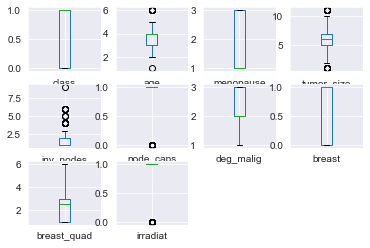

In [38]:
# Visualization
df.plot(kind='box',subplots=True, layout=(3, 4), sharex=False, sharey=False)
plt.show()

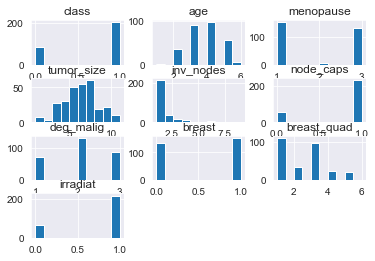

In [39]:
# Histogram
df.hist()
plt.show()

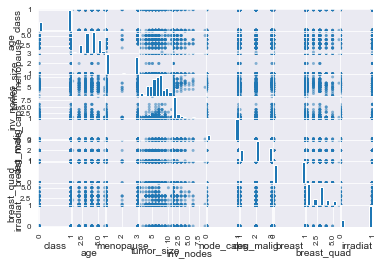

In [40]:
# Scatter plot
scatter_matrix(df)
plt.show()

In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
# Split dataset
X = df.drop(["class"], axis = 1)
Y = df["class"]


In [43]:
X.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,2,1,7,1,1,3,1,1,1
1,3,1,5,1,1,2,0,2,1
2,3,1,5,1,1,2,1,1,1
3,5,3,4,1,1,2,0,3,1
4,3,1,1,1,1,2,0,4,1


In [44]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

In [45]:
X.shape

(286, 9)

In [46]:
Y.shape

(286,)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=123)

In [48]:
x_train.shape

(228, 9)

In [49]:
y_train.shape

(228,)

In [50]:
x_test.shape

(58, 9)

In [51]:
y_test.shape

(58,)

In [61]:
models = []
models.append(('LR1', LogisticRegression(penalty='l1')))
models.append(('LR2', LogisticRegression(penalty='l2')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('RF', RandomForestClassifier(random_state=123)))
models.append(('GB', GradientBoostingClassifier(random_state=123)))

In [62]:
models

[('LR1', LogisticRegression(penalty='l1')),
 ('LR2', LogisticRegression()),
 ('DT', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('NB', GaussianNB()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('SGD', SGDClassifier()),
 ('MLP', MLPClassifier()),
 ('RF', RandomForestClassifier(random_state=123)),
 ('GB', GradientBoostingClassifier(random_state=123))]

In [63]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 2)
    cvresults = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cvresults)
    names.append(names)
    print('%s:%f(%f)'%(name, cvresults.mean(), cvresults.std()))

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_v

LR1:nan(nan)
LR2:0.723684(0.057018)
DT:0.587719(0.052632)
SVC:0.706140(0.057018)
NB:0.723684(0.065789)
LDA:0.719298(0.061404)
KNN:0.635965(0.057018)
SGD:0.741228(0.057018)


C:\Users\khade\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\khade\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP:0.710526(0.035088)
RF:0.671053(0.021930)
GB:0.627193(0.004386)


In [55]:
names

[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]

In [56]:
results

[array([nan, nan]),
 array([0.66666667, 0.78070175]),
 array([0.57017544, 0.68421053]),
 array([0.64912281, 0.76315789]),
 array([0.65789474, 0.78947368]),
 array([0.65789474, 0.78070175]),
 array([0.57894737, 0.69298246]),
 array([0.64912281, 0.76315789]),
 array([0.66666667, 0.71929825]),
 array([0.64912281, 0.69298246]),
 array([0.62280702, 0.63157895])]

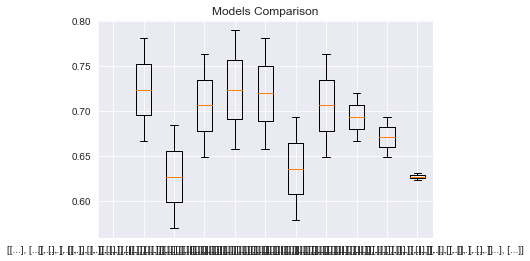

In [57]:
# Compare Algorithms or mode;s
plt.boxplot(results, labels=names)
plt.title('Models Comparison')
plt.show()

In [72]:
# Model Predictions
model = SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000,
                      tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None,
                      learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, 
                      n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
model.fit(x_train, y_train)

SGDClassifier(loss='modified_huber')

In [73]:
predictions = model.predict(x_test)

In [74]:
# Evaluate
print(accuracy_score(y_test,predictions))

0.7241379310344828
